In [5]:
import requests

URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/historical_automobile_sales.csv"

response = requests.get(URL)
data = response.text

# Now 'data' contains the content of the CSV file, and you can proceed with your processing.
print(data)

Date,Year,Month,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales,Vehicle_Type,City
1/31/1980,1980,Jan,1,108.24,0.5,27483.571,1558,7,60.223,0.01,5.4,456,Supperminicar,Georgia
2/29/1980,1980,Feb,1,98.75,0.75,24308.678,3048,4,45.986,-0.309594224,4.8,555.9,Supperminicar,New York
3/31/1980,1980,Mar,1,107.48,0.2,28238.443,3137,3,35.141,-0.30861387,3.4,620,Mediumfamilycar,New York
4/30/1980,1980,Apr,1,115.01,1,32615.149,1653,7,45.673,0.230595757,4.2,702.8,Supperminicar,Illinois
5/31/1980,1980,May,1,98.72,0.2,23829.233,1319,4,52.997,0.138196502,5.3,770.4,Smallfamiliycar,California
6/30/1980,1980,Jun,1,105.55,0.75,23829.315,2573,5,20.298,-1.610946891,2.9,754.5,Mediumfamilycar,Illinois
7/31/1980,1980,Jul,1,82.45,0.5,32896.064,2828,3,34.585,0.413098164,2.9,729.6,Supperminicar,Illinois
8/31/1980,1980,Aug,1,98.76,0.25,28837.174,2917,3,55.65,0.378526505,3,734.9,Supperminicar,New York
9/30/1980,1980,Sep,1,87.

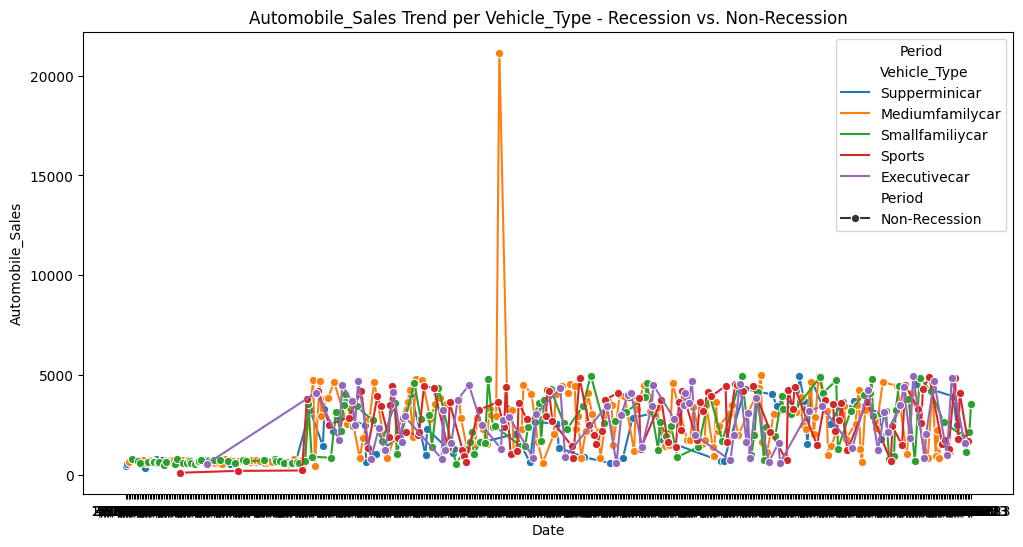

In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/historical_automobile_sales.csv"
df = pd.read_csv(url)

# Assuming you have a column named 'Date' representing the time period
# Define the recession and non-recession periods based on your data
# Replace the following placeholders with your actual date ranges
recession_start_date = 'yyyy-mm-dd'
recession_end_date = 'yyyy-mm-dd'
non_recession_start_date = 'yyyy-mm-dd'
non_recession_end_date = 'yyyy-mm-dd'

# Create a new column to mark recession and non-recession periods
df['Period'] = 'Non-Recession'
df.loc[(df['Date'] >= recession_start_date) & (df['Date'] <= recession_end_date), 'Period'] = 'Recession'

# Replace 'Automobile_Sales' with the actual column name representing automobile sales values
sales_column = 'Automobile_Sales'

# Create a Seaborn line plot to compare sales trends per vehicle type
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y=sales_column, hue='Vehicle_Type', data=df, style='Period', markers=True)
plt.title('Automobile_Sales Trend per Vehicle_Type - Recession vs. Non-Recession')
plt.xlabel('Date')
plt.ylabel('Automobile_Sales')
plt.legend(title='Period')
plt.show()


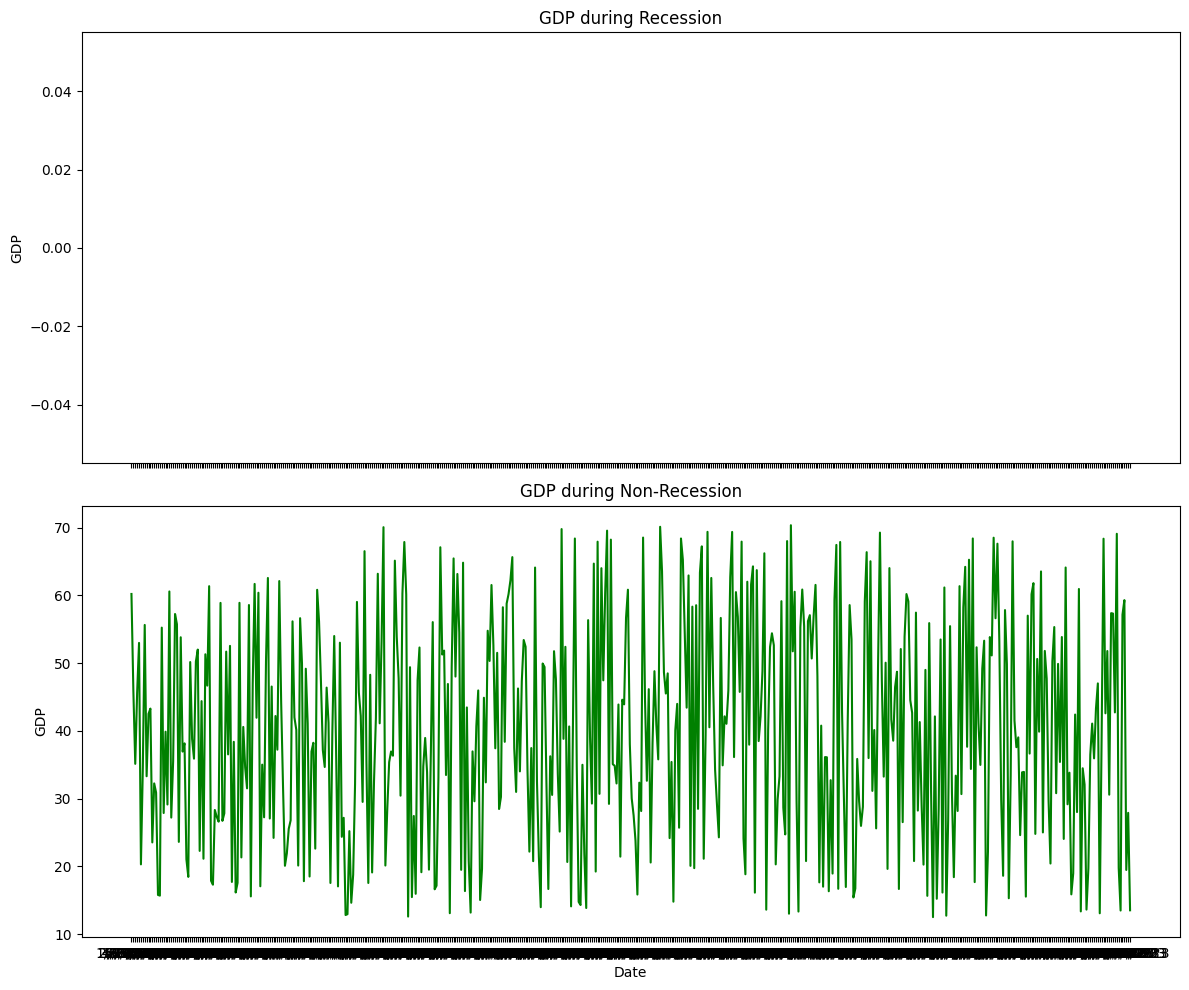

In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/historical_automobile_sales.csv"
df = pd.read_csv(url)

# Assuming you have a column named 'Date' representing the time period
# Define the recession and non-recession periods based on your data
# Replace the following placeholders with your actual date ranges
recession_start_date = 'yyyy-mm-dd'
recession_end_date = 'yyyy-mm-dd'
non_recession_start_date = 'yyyy-mm-dd'
non_recession_end_date = 'yyyy-mm-dd'

# Create a new column to mark recession and non-recession periods
df['Period'] = 'Non-Recession'
df.loc[(df['Date'] >= recession_start_date) & (df['Date'] <= recession_end_date), 'Period'] = 'Recession'

# Replace 'GDP' with the actual column name representing GDP
gdp_column = 'GDP'

# Set up subplots
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 10), sharex=True)

# Plot GDP during recession
sns.lineplot(x='Date', y=gdp_column, data=df[df['Period'] == 'Recession'], ax=axes[0], color='red')
axes[0].set_title('GDP during Recession')
axes[0].set_ylabel('GDP')

# Plot GDP during non-recession
sns.lineplot(x='Date', y=gdp_column, data=df[df['Period'] == 'Non-Recession'], ax=axes[1], color='green')
axes[1].set_title('GDP during Non-Recession')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('GDP')

# Adjust layout
plt.tight_layout()
plt.show()


C:\Users\toshiba\AppData\Local\Temp\ipykernel_10828\1112149004.py:26: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



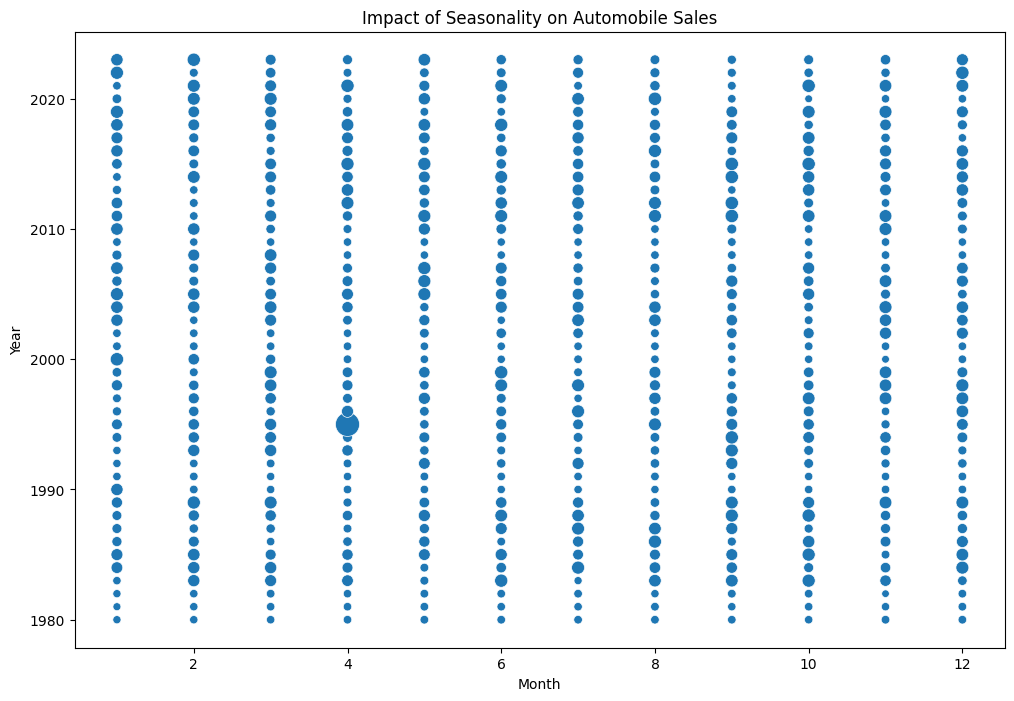

In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/historical_automobile_sales.csv"
df = pd.read_csv(url)

# Assuming you have a column named 'Date' representing the time period
# and 'Automobile_Sales' representing the sales values
# Replace the following placeholders with your actual column names
date_column = 'Date'
sales_column = 'Automobile_Sales'

# Extract month and year from the 'Date' column
df['Month'] = pd.to_datetime(df[date_column]).dt.month
df['Year'] = pd.to_datetime(df[date_column]).dt.year

# Aggregate sales data by month and year
monthly_sales = df.groupby(['Year', 'Month'])[sales_column].sum().reset_index()

# Set up the figure and axes
plt.figure(figsize=(12, 8))

# Create a bubble plot using Seaborn
sns.scatterplot(x='Month', y='Year', size=sales_column, data=monthly_sales, sizes=(30, 300), palette='viridis', legend=False)

# Customize the plot
plt.title('Impact of Seasonality on Automobile Sales')
plt.xlabel('Month')
plt.ylabel('Year')

# Show the plot
plt.show()
